In [1]:
import traj_dist.distance as tdist #to compile distances
import pyclustering as cl #to cluster the distances
import traja as tr #to work with trajectory data
import pandas as pd #to read csv file
import itertools #to compare all trajectories
import numpy as np
from matplotlib import pyplot as plt
from traja.frame import TrajaCollection #to use all trajectories at once
from datetime import datetime

test


In [16]:
dataframe = pd.read_csv("fall_migration.csv")
dataframe = dataframe.rename(columns={"Longitude": "x", "Latitude": "y", "Timestamp": "time"})
trj = tr.TrajaDataFrame(dataframe)
trajectories = TrajaCollection(trj, id_col="TagID")
trajectories_xy = trajectories[['AnimalID','x','y']]
timestamps = trajectories[['AnimalID','time']]
single_tr = trajectories_xy.groupby("AnimalID",group_keys=False)#Needed to have individual trajectories
single_timespan = timestamps.groupby("AnimalID",group_keys=False)#Needed to have individual timestamps
#trajectories.plot()
TagID = trajectories_xy[["AnimalID"]].values.ravel()
unique_ID =  pd.unique(TagID)
single_trj = np.asarray(single_tr)#needed to use traj_dist
single_trj = single_trj[:,[1]]
single_timespan = np.asarray(single_timespan)#needed to use traj_dist
single_timespan = single_timespan[:,[1]]
"""testa = single_trj[0][0]     Needed to test if it worked
testa = testa[['x','y']]
testa = np.asarray(testa)"""
print(dataframe)

       Unnamed: 0     AnimalID                     TagID          y  \
0            1705   E002(GWFG)               48511838495  73.455433   
1            1706   E002(GWFG)               48511838495  73.456300   
2            1707   E002(GWFG)               48511838495  73.455916   
3            1708   E002(GWFG)               48511838495  73.458700   
4            1709   E002(GWFG)               48511838495  73.456316   
...           ...          ...                       ...        ...   
63607      176441  D3391(GWFG)  100045000451353334393332  46.166644   
63608      176442  D3391(GWFG)  100045000451353334393332  46.155281   
63609      176443  D3391(GWFG)  100045000451353334393332  46.155348   
63610      176444  D3391(GWFG)  100045000451353334393332  46.155483   
63611      176445  D3391(GWFG)  100045000451353334393332  46.155753   

                x                 time  Unnamed: 0.1  
0      127.048233  2015-07-01 00:00:46        2519.0  
1      127.056033  2015-07-01 06:00:2

In [8]:
import datetime
print(dataframe['time'])
re_sampled = pd.DataFrame({'AnimalID': [],
                    'TagID': [],
                    'y': [],
                    'x': [],
                    'time': []})
old_time = datetime.datetime(2000, 11, 28, 23, 55, 59)
old_index = ""
'''for index, row in dataframe.iterrows():
    datetime_object = datetime.datetime.strptime(row['time'], '%Y-%m-%d %H:%M:%S')
    if(old_index == row['AnimalID']):
        if((old_time + datetime.timedelta(hours=2) <= datetime_object) or (old_time - datetime.timedelta(hours=2) >= datetime_object) ):
            re_sampled = re_sampled.append(row)
            old_time = datetime_object
    else:
        re_sampled = re_sampled.append(row)
        old_time = datetime.datetime(2000, 11, 28, 23, 55, 59)
    old_index = row['AnimalID']
    datetime_object = datetime.datetime.strptime(row['time'], '%Y-%m-%d %H:%M:%S')
'''



print(type(datetime_object))
re_sampled.to_csv('re_sampled_bird_data.csv')

0         2015-01-30 23:03:00
1         2015-01-31 00:00:00
2         2015-01-31 03:00:00
3         2015-01-31 06:00:00
4         2015-01-31 09:00:00
                 ...         
852367    2019-03-02 11:00:20
852368    2019-03-02 10:00:12
852369    2019-03-02 09:00:33
852370    2019-03-02 08:00:19
852371    2019-03-02 07:01:28
Name: time, Length: 852372, dtype: object
<class 'datetime.datetime'>


In [3]:
import datetime
print(dataframe['time'])
fall = pd.DataFrame({'AnimalID': [],
                    'TagID': [],
                    'y': [],
                    'x': [],
                    'time': []})
spring = pd.DataFrame({'AnimalID': [],
                    'TagID': [],
                    'y': [],
                    'x': [],
                    'time': []})
for index, row in dataframe.iterrows():
    datetime_object = datetime.datetime.strptime(row['time'], '%Y-%m-%d %H:%M:%S')
    if(datetime_object.month > 6):
        fall = fall.append(row)
    else:
        spring = spring.append(row)
        
        
print(fall)
fall.to_csv('fall_migration.csv')
spring.to_csv('spring_migration.csv')

0         2015-01-30 23:03:00
1         2015-01-31 00:00:00
2         2015-01-31 03:00:00
3         2015-01-31 06:00:00
4         2015-01-31 09:00:00
                 ...         
177455    2019-03-02 20:00:11
177456    2019-03-02 17:00:16
177457    2019-03-02 14:00:12
177458    2019-03-02 11:00:20
177459    2019-03-02 08:00:19
Name: time, Length: 177460, dtype: object
           AnimalID                     TagID          y           x  \
1705     E002(GWFG)               48511838495  73.455433  127.048233   
1706     E002(GWFG)               48511838495  73.456300  127.056033   
1707     E002(GWFG)               48511838495  73.455916  127.052100   
1708     E002(GWFG)               48511838495  73.458700  127.053383   
1709     E002(GWFG)               48511838495  73.456316  127.052633   
...             ...                       ...        ...         ...   
176441  D3391(GWFG)  100045000451353334393332  46.166644  124.359180   
176442  D3391(GWFG)  100045000451353334393332  46.15

In [17]:
# Set Time to Unix Timestamp
start_times = []
start_timestamps = []
for time in single_timespan:
    time_a = time[0]
    time_a = time_a[['time']]
    time_a = np.asarray(time_a)
    start_times.append(time_a[0])
for starttime in start_times:
    datetime_object = datetime.datetime.strptime(starttime[0], '%Y-%m-%d %H:%M:%S')
    start_timestamps.append(datetime.datetime.timestamp(datetime_object))
print(start_timestamps[0])

1573023614.0


In [18]:
gps = []
RNN_form = {'TRIP_ID':[],'CALL_TYPE' :[],'ORIGIN_CALL':[], 'ORIGIN_STAND': [], 'BIRD_ID': [],'TIMESTAMP': [],'DAYTYPE': [], 'MISSING_DATA': [],   'POLYLINE':[]}
for x in single_trj:
    traj_a = x[0]
    traj_a = traj_a[['x','y']].values.tolist()
    #traj_a = traj_a[['x','y']]
    #traj_a = np.asarray(traj_a)
    gps.append(traj_a)
for index, (ID, long_lang) in enumerate(zip(unique_ID, gps)):
    RNN_form['TRIP_ID'].append(index)
    RNN_form['POLYLINE'].append(long_lang)
    RNN_form['ORIGIN_CALL'].append(None)
    RNN_form['ORIGIN_STAND'].append(None)
    RNN_form['CALL_TYPE'].append('C')
    RNN_form['BIRD_ID'].append(ID)
    RNN_form['TIMESTAMP'].append(start_timestamps[index])
    RNN_form['DAYTYPE'].append('A')
    RNN_form['MISSING_DATA'].append(False)

In [19]:
df = pd.DataFrame(data=RNN_form)
df.to_csv('fall_resampled_bird_Data.csv')
'''train = df.iloc[:64, :]
test = df.iloc[64:, :]
train.to_csv('train_res.csv') #Write to csv file
test.to_csv('test_res.csv')'''

"train = df.iloc[:64, :]\ntest = df.iloc[64:, :]\ntrain.to_csv('train_res.csv') #Write to csv file\ntest.to_csv('test_res.csv')"

In [6]:
distance = []
for x in single_trj:
    traj_a = x[0]
    traj_a = traj_a[['x','y']]
    traj_a = np.asarray(traj_a)
    #distance.append(tdist.sspd(traj_a,testa,type_d="euclidean")) #needed for 1 trajectory comparison
    for y in single_trj:
        traj_b = y[0]
        traj_b = traj_b[['x','y']]
        traj_b = np.asarray(traj_b)
        distance.append(tdist.sspd(traj_a,traj_b,type_d="euclidean"))

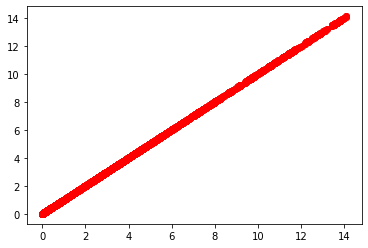

In [7]:
plt.scatter(distance, distance, c='r', label='data')
with open('listfile.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % distances for distances in distance)